### 7장 인공신경망으로 이미지 분류

===  1. 검증데이터 분리 ===
4422102/4422102 [==============================] - 0s 0us/step
train_input.shape=(60000, 28, 28) train_scaled.shape=(48000, 28, 28) train_target.shape=(48000,)
val_scaled.shape=(12000, 28, 28) val_target.shape=(12000,)
test_input.shape=(10000, 28, 28) test_target.shape=(10000,)

===  2. 계층정의 ===
Model: "Fashion_MNIST_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                           

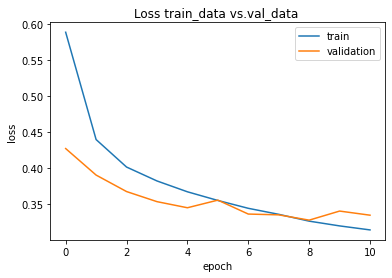

===  6. 시험 ===
313/313 [==============================] - 1s 2ms/step - loss: 0.3526 - accuracy: 0.8749


[0.352563738822937, 0.8748999834060669]

In [ ]:
# 1. 검증데이터 분리
print ( '===  1. 검증데이터 분리 ===')
from tensorflow import keras
(train_input, train_target),(test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255
from  sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2 , random_state = 42
)

print (f'{train_input.shape=} {train_scaled.shape=} {train_target.shape=}')
print (f'{val_scaled.shape=} {val_target.shape=}')
print (f'{test_input.shape=} {test_target.shape=}')

# 2. 계층 정의
print ( '\n===  2. 계층정의 ===')
model = keras.Sequential(name = 'Fashion_MNIST_Dense')
model.add (keras.layers.Flatten (input_shape = (28,28), name='flatten'))
model.add (keras.layers.Dense (100, activation = 'relu', name = 'hidden'))
model.add (keras.layers.Dropout (0.3, name = 'dropout'))
model.add (keras.layers.Dense (10, activation = 'softmax', name = 'output'))
model.summary()

# 3. 학습환경 설정
print ( '\n===  3. 학습환경 설정 ===')
model.compile (optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
               metrics = 'accuracy')
print ('model compile done')

# 4. 학습
print ( '\n===  4. 학습 ===')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dense.h5')
early_stopping_cb =keras.callbacks.EarlyStopping (patience = 2, 
                                                  restore_best_weights = True)

history = model.fit (train_scaled, train_target, epochs = 20, 
           validation_data = (val_scaled, val_target),
           callbacks = [checkpoint_cb, early_stopping_cb])



# 5. 검증
print ( '\n===  5. 검증 ===')
model.evaluate (val_scaled, val_target)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title ('Loss train_data vs.val_data ')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

# 6. 시험
print ( '===  6. 시험 ===')
test_scaled = test_input /255.0
model.evaluate (test_scaled, test_target)

## 8장 이미지 분류를 위한 신경망 (CNN)
Convolutional Nueral Network

### CNN 4층 망 
* 합성곱 32개 필터 3x3 - 최대 풀링 2x2  (relu)
* 합성곱 64개 필터 3x3 - 최대 풀링 (relu)
* 은닉 밀집 층 (Hidden Dense) 100개 뉴런 (relu)  - dropout 0.3
* 출력 밀집 층 (Ouput Dense) 10 개 뉴런 (softmax)


===  1. 검증데이터 분리 ===
4422102/4422102 [==============================] - 0s 0us/step
train_input.shape=(60000, 28, 28) train_scaled.shape=(48000, 28, 28, 1) train_target.shape=(48000,)
val_scaled.shape=(12000, 28, 28, 1) val_target.shape=(12000,)
test_input.shape=(10000, 28, 28) test_target.shape=(10000,)

===  2. 계층정의 ===
Model: "Fashion_MNIST_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_1st (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 MaxPooling_1st (MaxPooling2  (None, 14, 14, 32)       0         
 D)                                                              
                                                                 
 Conv_2nd (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 MaxPooling_2nd (MaxPooling2  (None, 7, 7, 64)         

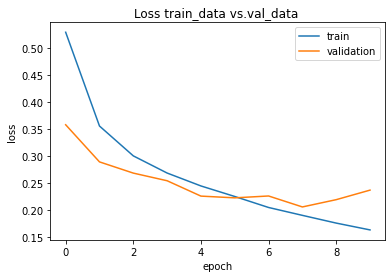

===  6. 시험 ===
313/313 [==============================] - 1s 3ms/step - loss: 0.2328 - accuracy: 0.9152


[0.23280055820941925, 0.9151999950408936]

In [1]:
# 1. 검증데이터 분리
print ( '===  1. 검증데이터 분리 ===')
from tensorflow import keras
(train_input, train_target),(test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1,28,28,1) / 255
from  sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2 , random_state = 42
)

print (f'{train_input.shape=} {train_scaled.shape=} {train_target.shape=}')
print (f'{val_scaled.shape=} {val_target.shape=}')
print (f'{test_input.shape=} {test_target.shape=}')

# 2. 계층 정의
print ( '\n===  2. 계층정의 ===')
model = keras.Sequential(name = 'Fashion_MNIST_CNN')
model.add (keras.layers.Conv2D (32, kernel_size = 3, activation = 'relu',
                                padding = 'same', input_shape = (28,28,1),
                                name = 'Conv_1st'))
model.add (keras.layers.MaxPooling2D(2, name = 'MaxPooling_1st'))
model.add (keras.layers.Conv2D (64, kernel_size = 3, activation = 'relu',
                                padding = 'same', name = 'Conv_2nd'))
model.add (keras.layers.MaxPooling2D(2, name = 'MaxPooling_2nd'))
model.add (keras.layers.Flatten(name = 'flatten'))
model.add (keras.layers.Dense (100, activation = 'relu', name = 'hidden'))
model.add (keras.layers.Dropout (0.4, name = 'dropout'))
model.add (keras.layers.Dense (10, activation = 'softmax', name = 'output'))
model.summary()


# 3. 학습환경 설정
print ( '\n===  3. 학습환경 설정 ===')
model.compile (optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
               metrics = 'accuracy')
print ('model compile done')

# 4. 학습
print ( '\n===  4. 학습 ===')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn.h5')
early_stopping_cb =keras.callbacks.EarlyStopping (patience = 2, 
                                                  restore_best_weights = True)

history = model.fit (train_scaled, train_target, epochs = 20, 
           validation_data = (val_scaled, val_target),
           callbacks = [checkpoint_cb, early_stopping_cb])



# 5. 검증
print ( '\n===  5. 검증 ===')
model.evaluate (val_scaled, val_target)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title ('Loss train_data vs.val_data ')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

# 6. 시험
print ( '===  6. 시험 ===')
test_scaled = test_input.reshape(-1,28,28,1) /255.0
model.evaluate (test_scaled, test_target)

### 가중치와 특성맵 시각화

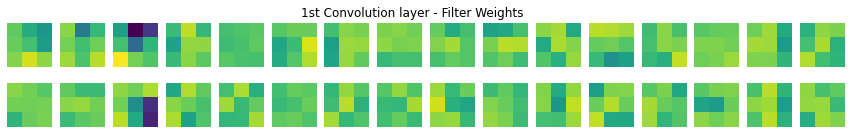

1/1 [==============================] - 0s 35ms/step


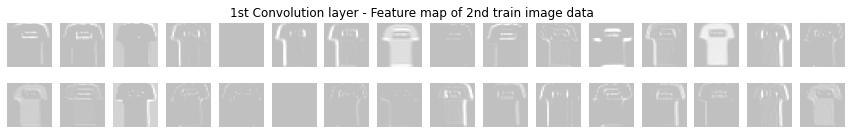

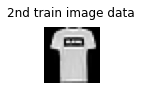

In [5]:
# 가중치의 시각화
conv_weights = model.layers[0].weights[0].numpy()

fig, axs = plt.subplots(2,16, figsize = (15,2))
for i , axe in enumerate (axs.flat) :
  axe.imshow(conv_weights[:,:,0,i], vmin= -1.5, vmax = 0.5)
  axe.axis ('off')
fig.suptitle('1st Convolution layer - Filter Weights')
plt.show()

# 특성맵의 시각화
conv_acti = keras.Model(model.input, model.layers[0].output)

inputs = train_input[1:2].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

fig, axs = plt.subplots(2,16, figsize = (15,2))
for i , axe in enumerate (axs.flat) :
  axe.imshow(feature_maps[0,:,:,i], vmin= -1.5, vmax = 0.5, cmap = 'gray')
  axe.axis ('off')
fig.suptitle('1st Convolution layer - Feature map of 2nd train image data')
plt.show()

# 2nd train_input image
fig, axe = plt.subplots(1,1, figsize = (1,1.4))
axe.imshow (inputs.reshape (28, 28), cmap = 'gray')
axe.axis('off')
fig.suptitle('2nd train image data')
plt.show()

## 9장 텍스트를 위한 신경망 (RNN)
Recurrent Neural Network

### SimpleRNN with One-Hot Expression
* 단어표현 : 500 단어의 One-Hot Encoding (item 크기 = 500)
* SimpleRNN - 8 cell
* Dense - 1 (sigmoid)

===  1. 검증데이터 분리 ===
17464789/17464789 [==============================] - 0s 0us/step
train_input.shape=(20000,) train_seq.shape=(20000, 100) train_oh.shape=(20000, 100, 500) train_target.shape=(20000,)
val_input.shape=(5000,) val_seq.shape=(5000, 100) val_oh.shape=(5000, 100, 500) val_target.shape=(5000,)
test_input.shape=(25000,) test_target.shape=(25000,)

===  2. 계층정의 ===
Model: "imdb_SimpleRNN_OneHot"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 RNN_1st (SimpleRNN)         (None, 8)                 4072      
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________

===  3. 학습환경 설정 ===
model compile done

===  4. 학습 ===
Epoc

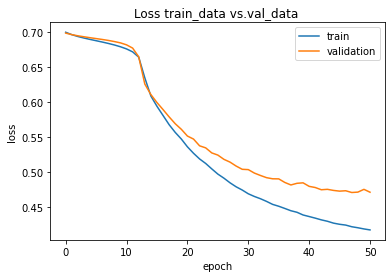

In [1]:
# 1. 데이터 준비 및 검증데이터 분리
print ( '===  1. 검증데이터 분리 ===')
from tensorflow import keras

(train_input, train_target),(test_input, test_target) = \
  keras.datasets.imdb.load_data(num_words = 500)

from sklearn.model_selection import train_test_split
train_input, val_input , train_target, val_target = \
  train_test_split (train_input, train_target, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences ( train_input , maxlen = 100)
val_seq = pad_sequences (val_input, maxlen = 100)

from keras.utils import to_categorical
train_oh = to_categorical(train_seq)
val_oh = to_categorical(val_seq)

print (f'{train_input.shape=} {train_seq.shape=} {train_oh.shape=} {train_target.shape=}')
print (f'{val_input.shape=} {val_seq.shape=} {val_oh.shape=} {val_target.shape=}')
print (f'{test_input.shape=} {test_target.shape=}')

# 2. 계층 정의
print ( '\n===  2. 계층정의 ===')
model = keras.Sequential(name = 'imdb_SimpleRNN_OneHot')
model.add (keras.layers.SimpleRNN (8, input_shape = (100,500),
                                name = 'RNN_1st'))
model.add (keras.layers.Dense (1, activation = 'sigmoid', name = 'output'))
model.summary()


# 3. 학습환경 설정
print ( '\n===  3. 학습환경 설정 ===')
rmsprop = keras.optimizers.RMSprop (learning_rate = 1e-4)
model.compile (optimizer = rmsprop, loss = 'binary_crossentropy',
               metrics = 'accuracy')
print ('model compile done')

# 4. 학습
print ( '\n===  4. 학습 ===')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simpleRNN-OH.h5')
early_stopping_cb =keras.callbacks.EarlyStopping (patience = 3, 
                                                  restore_best_weights = True)

history = model.fit (train_oh, train_target, epochs = 100, 
           batch_size = 64,
           validation_data = (val_oh, val_target),
           callbacks = [checkpoint_cb, early_stopping_cb])

# 5. 검증
print ( '\n===  5. 검증 ===')
model.evaluate (val_oh, val_target)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title ('Loss train_data vs.val_data ')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

### SimpleRNN with Word Embedding
* 단어표현 : 크기 16의 단어 벡터 (item 크기 = 16)
* Embedding 
* SimpleRNN - 8 cell
* Dense - 1 (sigmoid)

train_input.shape=(20000,) train_seq.shape=(20000, 100) train_target.shape=(20000,)
val_input.shape=(5000,) val_seq.shape=(5000, 100) val_target.shape=(5000,)
test_input.shape=(25000,) test_target.shape=(25000,)

===  2. 계층정의 ===
Model: "imdb_SimpleRNN_WordEmbedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed (Embedding)           (None, 100, 16)           8000      
                                                                 
 simple_rnn (SimpleRNN)      (None, 8)                 200       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________

===  3. 학습환경 설정 ===
model compile done

===  4. 학습 ===
Epoch 1/100
31

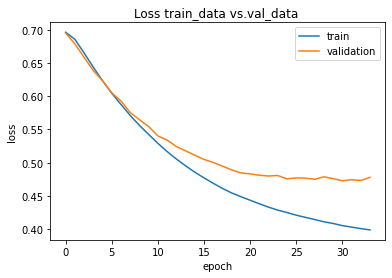

In [ ]:
# 1. 데이터 준비 및 검증데이터 분리
print ( '===  1. 검증데이터 분리 ===')
from tensorflow import keras

(train_input, train_target),(test_input, test_target) = \
  keras.datasets.imdb.load_data(num_words = 500)

from sklearn.model_selection import train_test_split
train_input, val_input , train_target, val_target = \
  train_test_split (train_input, train_target, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences ( train_input , maxlen = 100)
val_seq = pad_sequences (val_input, maxlen = 100)


print (f'{train_input.shape=} {train_seq.shape=} {train_target.shape=}')
print (f'{val_input.shape=} {val_seq.shape=} {val_target.shape=}')
print (f'{test_input.shape=} {test_target.shape=}')

# 2. 계층 정의
print ( '\n===  2. 계층정의 ===')
model2 = keras.Sequential(name = 'imdb_SimpleRNN_WordEmbedding')
model2.add (keras.layers.Embedding (500, 16, input_length = 100, name = 'embed'))
model2.add (keras.layers.SimpleRNN(8), name = 'simple_rnn')
model2.add (keras.layers.Dense (1, activation = 'sigmoid', name = 'output'))
model2.summary()


# 3. 학습환경 설정
print ( '\n===  3. 학습환경 설정 ===')
rmsprop = keras.optimizers.RMSprop (learning_rate = 1e-4)
model2.compile (optimizer = rmsprop, loss = 'binary_crossentropy',
               metrics = 'accuracy')
print ('model compile done')

# 4. 학습
print ( '\n===  4. 학습 ===')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simpleRNN-WE.h5')
early_stopping_cb =keras.callbacks.EarlyStopping (patience = 3, 
                                                  restore_best_weights = True)

history = model2.fit (train_seq, train_target, epochs = 100, 
           batch_size = 64,
           validation_data = (val_seq, val_target),
           callbacks = [checkpoint_cb, early_stopping_cb])

# 5. 검증
print ( '\n===  5. 검증 ===')
model2.evaluate (val_seq, val_target)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title ('Loss train_data vs.val_data ')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

### Dual LSTM with dropout / word embedding
* 단어표현 : 크기 16의 단어 벡터 (item 크기 = 16)
* Embedding 
* LSTM - 8 cell / dropout = 0.3, return_sequences = True
* LSTM - 8 cell / dropout = 0.3
* Dense - 1 (sigmoid)

===  1. 검증데이터 분리 ===
17464789/17464789 [==============================] - 0s 0us/step
train_input.shape=(20000,) train_seq.shape=(20000, 100) train_target.shape=(20000,)
val_input.shape=(5000,) val_seq.shape=(5000, 100) val_target.shape=(5000,)
test_input.shape=(25000,) test_target.shape=(25000,)

===  2. 계층정의 ===
Model: "imdb_Dual_LSTM_WordEmbedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed (Embedding)           (None, 100, 16)           8000      
                                                                 
 1st_lstm (LSTM)             (None, 100, 8)            800       
                                                                 
 2nd_lstm (LSTM)             (None, 8)                 544       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                    

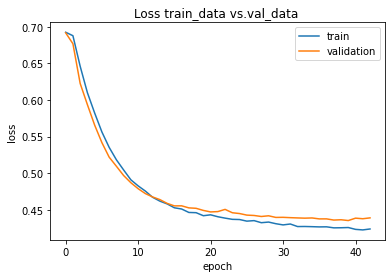

In [6]:
# 1. 데이터 준비 및 검증데이터 분리
print ( '===  1. 검증데이터 분리 ===')
from tensorflow import keras

(train_input, train_target),(test_input, test_target) = \
  keras.datasets.imdb.load_data(num_words = 500)

from sklearn.model_selection import train_test_split
train_input, val_input , train_target, val_target = \
  train_test_split (train_input, train_target, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences ( train_input , maxlen = 100)
val_seq = pad_sequences (val_input, maxlen = 100)


print (f'{train_input.shape=} {train_seq.shape=} {train_target.shape=}')
print (f'{val_input.shape=} {val_seq.shape=} {val_target.shape=}')
print (f'{test_input.shape=} {test_target.shape=}')

# 2. 계층 정의
print ( '\n===  2. 계층정의 ===')
model3 = keras.Sequential(name = 'imdb_Dual_LSTM_WordEmbedding')
model3.add (keras.layers.Embedding (500, 16, input_length = 100, name = 'embed'))
model3.add (keras.layers.LSTM(8, dropout = 0.3, return_sequences = True, name = '1st_lstm' ))
model3.add (keras.layers.LSTM(8, dropout = 0.3, name = '2nd_lstm'))
model3.add (keras.layers.Dense (1, activation = 'sigmoid', name = 'output'))
model3.summary()


# 3. 학습환경 설정
print ( '\n===  3. 학습환경 설정 ===')
rmsprop = keras.optimizers.RMSprop (learning_rate = 1e-4)
model3.compile (optimizer = rmsprop, loss = 'binary_crossentropy',
               metrics = 'accuracy')
print ('model compile done')

# 4. 학습
print ( '\n===  4. 학습 ===')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-Dual-LSTM-WE.h5')
early_stopping_cb =keras.callbacks.EarlyStopping (patience = 3, 
                                                  restore_best_weights = True)

history = model3.fit (train_seq, train_target, epochs = 100, 
           batch_size = 64,
           validation_data = (val_seq, val_target),
           callbacks = [checkpoint_cb, early_stopping_cb])

# 5. 검증
print ( '\n===  5. 검증 ===')
model3.evaluate (val_seq, val_target)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title ('Loss train_data vs.val_data ')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

### GRU word embedding
* 단어표현 : 크기 16의 단어 벡터 (item 크기 = 16)
* Embedding 
* GRU - 8 cell 
* Dense - 1 (sigmoid)

train_input.shape=(20000,) train_seq.shape=(20000, 100) train_target.shape=(20000,)
val_input.shape=(5000,) val_seq.shape=(5000, 100) val_target.shape=(5000,)
test_input.shape=(25000,) test_target.shape=(25000,)

===  2. 계층정의 ===
Model: "imdb_GRU_WordEmbedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed (Embedding)           (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________

===  3. 학습환경 설정 ===
model compile done

===  4. 학습 ===
Epoch 1/100
313/313 

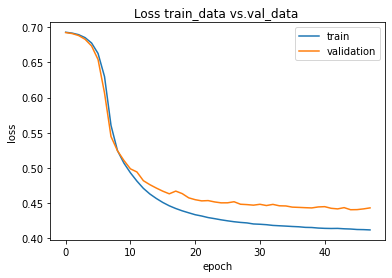

In [ ]:
# 1. 데이터 준비 및 검증데이터 분리
print ( '===  1. 검증데이터 분리 ===')
from tensorflow import keras

(train_input, train_target),(test_input, test_target) = \
  keras.datasets.imdb.load_data(num_words = 500)

from sklearn.model_selection import train_test_split
train_input, val_input , train_target, val_target = \
  train_test_split (train_input, train_target, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences ( train_input , maxlen = 100)
val_seq = pad_sequences (val_input, maxlen = 100)


print (f'{train_input.shape=} {train_seq.shape=} {train_target.shape=}')
print (f'{val_input.shape=} {val_seq.shape=} {val_target.shape=}')
print (f'{test_input.shape=} {test_target.shape=}')

# 2. 계층 정의
print ( '\n===  2. 계층정의 ===')
model4 = keras.Sequential(name = 'imdb_GRU_WordEmbedding')
model4.add (keras.layers.Embedding (500, 16, input_length = 100, name = 'embed'))
model4.add (keras.layers.GRU(8,  name = 'gru'))
model4.add (keras.layers.Dense (1, activation = 'sigmoid', name = 'output'))
model4.summary()


# 3. 학습환경 설정
print ( '\n===  3. 학습환경 설정 ===')
rmsprop = keras.optimizers.RMSprop (learning_rate = 1e-4)
model4.compile (optimizer = rmsprop, loss = 'binary_crossentropy',
               metrics = 'accuracy')
print ('model compile done')

# 4. 학습
print ( '\n===  4. 학습 ===')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-GRU-WE.h5')
early_stopping_cb =keras.callbacks.EarlyStopping (patience = 3, 
                                                  restore_best_weights = True)

history = model4.fit (train_seq, train_target, epochs = 100, 
           batch_size = 64,
           validation_data = (val_seq, val_target),
           callbacks = [checkpoint_cb, early_stopping_cb])

# 5. 검증
print ( '\n===  5. 검증 ===')
model4.evaluate (val_seq, val_target)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title ('Loss train_data vs.val_data ')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

### Final Selection : Dual LSTM  & test evaluation

In [10]:
# 5. 검증
print ( '===  5. 검증 ===')
rnn_model = keras.models.load_model('best-Dual-LSTM-WE.h5')
rnn_model.evaluate(val_seq, val_target)


# 6. 시험
print ( '===  6. 시험 ===')
test_seq = pad_sequences(test_input , maxlen=100)
rnn_model.evaluate(test_seq, test_target)

===  5. 검증 ===
157/157 [==============================] - 2s 6ms/step - loss: 0.4388 - accuracy: 0.7982
===  6. 시험 ===
782/782 [==============================] - 4s 6ms/step - loss: 0.4326 - accuracy: 0.7970


[0.43263933062553406, 0.796999990940094]

### 부록 : Dual GRU with dropout / word embedding

===  1. 검증데이터 분리 ===
train_input.shape=(20000,) train_seq.shape=(20000, 100) train_target.shape=(20000,)
val_input.shape=(5000,) val_seq.shape=(5000, 100) val_target.shape=(5000,)
test_input.shape=(25000,) test_target.shape=(25000,)

===  2. 계층정의 ===
Model: "imdb_Dual_GRU_WordEmbedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed (Embedding)           (None, 100, 16)           8000      
                                                                 
 gru_1st (GRU)               (None, 100, 8)            624       
                                                                 
 gru_2nd (GRU)               (None, 8)                 432       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 9,065
Trainable params: 9,065
Non-trai

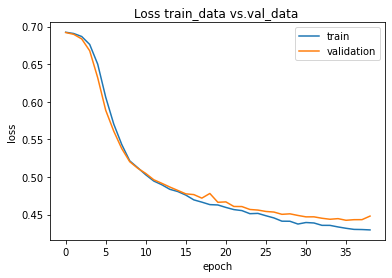

In [11]:
# 1. 데이터 준비 및 검증데이터 분리
print ( '===  1. 검증데이터 분리 ===')
from tensorflow import keras

(train_input, train_target),(test_input, test_target) = \
  keras.datasets.imdb.load_data(num_words = 500)

from sklearn.model_selection import train_test_split
train_input, val_input , train_target, val_target = \
  train_test_split (train_input, train_target, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences ( train_input , maxlen = 100)
val_seq = pad_sequences (val_input, maxlen = 100)


print (f'{train_input.shape=} {train_seq.shape=} {train_target.shape=}')
print (f'{val_input.shape=} {val_seq.shape=} {val_target.shape=}')
print (f'{test_input.shape=} {test_target.shape=}')

# 2. 계층 정의
print ( '\n===  2. 계층정의 ===')
model5 = keras.Sequential(name = 'imdb_Dual_GRU_WordEmbedding')
model5.add (keras.layers.Embedding (500, 16, input_length = 100, name = 'embed'))
model5.add (keras.layers.GRU(8,  dropout = 0.3, return_sequences = True, name = 'gru_1st'))
model5.add (keras.layers.GRU(8,  dropout = 0.3, name = 'gru_2nd'))
model5.add (keras.layers.Dense (1, activation = 'sigmoid', name = 'output'))
model5.summary()


# 3. 학습환경 설정
print ( '\n===  3. 학습환경 설정 ===')
rmsprop = keras.optimizers.RMSprop (learning_rate = 1e-4)
model5.compile (optimizer = rmsprop, loss = 'binary_crossentropy',
               metrics = 'accuracy')
print ('model compile done')

# 4. 학습
print ( '\n===  4. 학습 ===')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-Dual-GRU-WE.h5')
early_stopping_cb =keras.callbacks.EarlyStopping (patience = 3, 
                                                  restore_best_weights = True)

history = model5.fit (train_seq, train_target, epochs = 100, 
           batch_size = 64,
           validation_data = (val_seq, val_target),
           callbacks = [checkpoint_cb, early_stopping_cb])

# 5. 검증
print ( '\n===  5. 검증 ===')
model5.evaluate (val_seq, val_target)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title ('Loss train_data vs.val_data ')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()